# **Información General**

**Asignatura:** Matemáticas para la Inteligencia Artificial

**Nombre y Apellidos:** Velasteguí Izurieta Homero Javier

**Url:** https://github.com/fresvel/02MIAR_Ejercicios/blob/main/Ejercicios.ipynb

# **Ejercicio 1**

Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el
álgebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de
técnicas relacionadas con el aprendizaje automático. Con ella, podemos describir el proceso
de propagación hacia adelante en una red neuronal, identificar mı́nimos locales en funciones
multivariables (crucial para el proceso de retropropagación) o la descripción y empleo de
métodos de reducción de la dimensionalidad, como el análisis de componentes principales
(PCA), entre muchas otras aplicaciones.
Cuando trabajamos en la práctica dentro de este ámbito, la cantidad de datos que manejamos
puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes
y optimizados para reducir el coste computacional en la medida de lo posible. Por todo ello,
el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir
para realizar un proceso relacionado con el álgebra lineal y el impacto que puede tener cada
variante en términos del coste computacional del mismo. En este caso en particular, y a modo
de ilustración, nos centraremos en el cálculo del determinante de una matriz.

## **a) [1 punto] Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.**

Sea $A = [a_{ij}] \in \mathbb{R}^{n \times n}$ una matriz cuadrada. El determinante de $A$, denotado como $\det(A)$, puede definirse recursivamente mediante la expansión de Laplace por la primera fila:

$$
\det(A) = \sum_{j=0}^{n-1} (-1)^j \cdot a_{0j} \cdot \det(M_{0j})
$$

Donde:

-$a_{0j}$ es el elemento en la fila 0 y columna \( j \) de \( A \),

-$M_{0j}$ es la submatriz que resulta al eliminar la fila 0 y la columna \( j \).


In [1]:
def determinante_recursivo(matriz):
    """
    Calcula el determinante de una matriz cuadrada usando la definición recursiva de Laplace.
    
    Parámetro:
    matriz (list[list[float]]): matriz cuadrada
    
    Retorna:
    float: determinante de la matriz
    """
    n = len(matriz)

    # Verificar si es una matriz cuadrada
    if any(len(fila) != n for fila in matriz):
        raise ValueError("La matriz debe ser cuadrada")

    # Caso base: matriz 1x1
    if n == 1:
        return matriz[0][0]

    # Caso base: matriz 2x2
    if n == 2:
        return matriz[0][0]*matriz[1][1] - matriz[0][1]*matriz[1][0]

    # Caso general: expansión de Laplace por la primera fila
    det = 0
    for j in range(n):
        # Cofactor: signo alternado
        signo = (-1) ** j

        # Submatriz sin la primera fila y la columna j
        submatriz = [fila[:j] + fila[j+1:] for fila in matriz[1:]]

        # Cálculo recursivo
        det += signo * matriz[0][j] * determinante_recursivo(submatriz)

    return det


# Ejemplo de uso:
matriz = [
    [7, 6, -2],
    [-3, -4, 5],
    [-6, 2, -1]
]
print("Determinante:", determinante_recursivo(matriz))

Determinante: -180


## **b) [0.5 puntos] Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifı́quese la respuesta.**

Sí, existe una forma directa y sencilla de calcular el determinante de una matriz cuadrada $n \times n$ que es triangular (superior o inferior).

La justificación se encuentra en las propiedades de las matrices triangulares. Cuando una matriz es triangular, ya sea superior (con entradas nulas por debajo de la diagonal principal) o inferior (con entradas nulas por encima de la diagonal principal), se cumple que **sus determinantes son simplemente el producto de los elementos de sus diagonales**

De manera específica en el contexto de la factorización LU una matriz puede descomponerse en el producto de una matriz triangular inferior (L) y una triangular superior (U), y que el determinante de estas matrices triangulares se calcula directamente multiplicando los elementos de sus diagonales

Por ejemplo, para una matriz triangular inferior o superior, el cálculo es mucho más simple que aplicar la definición recursiva de Laplace o el método de eliminación de Gauss, ya que no se requieren expansiones complejas o transformaciones de filas. Simplemente se multiplican los elementos de la diagonal principal de la matriz.

A continuación, se presenta una demostración en Python donde se calcula el determinante de dos matrices triangulares (una superior y una inferior, respectivamente), utilizando la función recursiva basada en la expansión de Laplace implementada anteriormente. Además, se calcula el determinante de cada matriz usando el producto de los elementos de su diagonal, para demostrar la igualdad.


In [2]:
import numpy as np
def determinante_diagonal(matriz):
    """
    Calcula el determinante de una matriz cuadrada triangular (superior o inferior)
    usando el producto de los elementos de su diagonal principal.

    Parámetro:
    matriz (list[list[float]]): matriz cuadrada triangular

    Retorna:
    float: determinante de la matriz
    """
    n = len(matriz)

    # Verificar que sea cuadrada
    if any(len(fila) != n for fila in matriz):
        raise ValueError("La matriz debe ser cuadrada")

    # Verificar si es triangular superior
    #es_superior = all(matriz[i][j] == 0 for i in range(1, n) for j in range(i))
    es_superior = all(np.isclose(matriz[i][j], 0) for i in range(1, n) for j in range(i))

    # Verificar si es triangular inferior
    #es_inferior = all(matriz[i][j] == 0 for i in range(n) for j in range(i + 1, n))
    es_inferior = all(np.isclose(matriz[i][j], 0) for i in range(n) for j in range(i + 1, n))
    

    if not (es_superior or es_inferior):
        raise ValueError("La matriz no es triangular superior ni inferior")

    # Calcular el producto de los elementos de la diagonal principal
    det = 1
    for i in range(n):
        det *= matriz[i][i]

    return det


**Verificación**

In [3]:
matriz_superior_7x7 = [
    [  9,  -3,   6,   8,  -7,   5,  -1],
    [  0,   4,  -9,   2,   7,  -5,   6],
    [  0,   0,  -8,   3,  -6,   9,   4],
    [  0,   0,   0,  10,  -4,   2,  -3],
    [  0,   0,   0,   0,   5,  -7,   1],
    [  0,   0,   0,   0,   0,  -6,   8],
    [  0,   0,   0,   0,   0,   0,  -2]
]

matriz_inferior_7x7 = [
    [ -7,   0,   0,   0,   0,   0,   0],
    [  6,  -3,   0,   0,   0,   0,   0],
    [  2,  -1,   9,   0,   0,   0,   0],
    [ -8,   4,   5,  -2,   0,   0,   0],
    [  3,  -7,   1,   6,  10,   0,   0],
    [  5,   2,  -4,   3,  -9,  -8,   0],
    [ -1,   7,   8,  -5,   4,  -6,   3]
]

print("Resultados con Recursividad de Laplace:")
print("Determinante matriz triangular superior:", determinante_recursivo(matriz_superior_7x7))
print("Determinante matriz triangular inferior:", determinante_recursivo(matriz_inferior_7x7))
print("Resultados con el Producto de los Elementos de la Diagonal:")
print("Determinante matriz triangular superior:", determinante_diagonal(matriz_superior_7x7))
print("Determinante matriz triangular inferior:", determinante_diagonal(matriz_inferior_7x7))


Resultados con Recursividad de Laplace:
Determinante matriz triangular superior: -172800
Determinante matriz triangular inferior: 90720
Resultados con el Producto de los Elementos de la Diagonal:
Determinante matriz triangular superior: -172800
Determinante matriz triangular inferior: 90720


## **c) [0.5 puntos] Determı́nese de forma justificada cómo alteran el determinante de una matriz n × n las dos operaciones elementales siguientes:**

**Intercambiar una fila (o columna) por otra fila (o columna).**

**Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar $\alpha$**

Las operaciones elementales de filas y columnas son transformaciones fundamentales en el álgebra lineal que se aplican a las matrices. Su efecto en el determinante de una matriz $n \times n$ permite entender cómo calcular su valor de forma eficiente mediante la eliminación de Gauss.

A continuación, se detalla cómo las dos operaciones elementales mencionadas altera el valor del determinante de la matriz.

**1. Intercambiar una fila (o columna) por otra fila (o columna):**

Esta operación elemental consiste en alternar la posición de dos filas (o dos columnas) entre sí. Siendo $C_i$ y $C_j$ dos columnas de una matriz $A_{m \times n}$, se puede realizar un intercambio $C_i \leftrightarrow C_j$ para obtener una nueva matriz $A'$. 

El determinante es una función multilineal y alternante definida sobre las filas o columnas de una matriz, lo que implica que al intercambiar dos filas o dos columnas, el valor del determinante cambia de signo. Esta propiedad se fundamenta en la definición del determinante como una suma sobre todas las permutaciones posibles de las columnas, donde cada término está multiplicado por el signo de la permutación. Como una transposición (el intercambio de dos elementos) tiene signo negativo, intercambiar dos filas o columnas corresponde a componer la permutación original con una transposición, cambiando así el signo del determinante. Por lo tanto, el cambio de signo del determinante al intercambiar filas o columnas es una consecuencia directa de su naturaleza alternante.

Se proporciona un ejemplo donde una matriz $A_{7 \times 7}$ se transforma en $A'$ al cambiar las columnas $C_4$ y $C_1$ y otro adicional en el que se transforma al cambiar las filas $F_3$ y $F_5$ para validar esta argumentación con un ejemplo:

In [4]:
import numpy as np

def change_filas_columnas(matriz, i, j, factor="f"):
    """
    Intercambia las filas o columnas de los índices i y j en función del factor. 
    Si el factor es 'f' se intercambian las filas, si es 'c' se intercambian las columnas.

    Parámetros:
    matriz (list[list[float]] o np.ndarray): matriz cuadrada
    i (int): índice de fila o columna
    j (int): índice de fila o columna
    factor (str): 'f' para intercambiar filas, 'c' para columnas

    Retorna:
    np.ndarray: nueva matriz con filas o columnas intercambiadas
    """
    A = np.array(matriz, dtype=float).copy()

    if factor == "f":
        A[[i, j], :] = A[[j, i], :]
    elif factor == "c":
        A[:, [i, j]] = A[:, [j, i]]
    else:
        raise ValueError("El parámetro 'factor' debe ser 'f' (fila) o 'c' (columna).")

    return A

np.random.seed(42)
matriz=np.random.randint(-99, 99, size=(7,7))
print("Matriz Original")
print(matriz)
print("Determinante de Matríz Original")
print(determinante_recursivo(matriz.tolist()))

print("Intercambio de Filas")
matriz_intercambio_filas=change_filas_columnas(matriz, 3,5, 'f')
print(matriz_intercambio_filas)
print("Determinante de Matríz con Intercambio de Filas")
print(determinante_recursivo(matriz_intercambio_filas.tolist()))

print("Intercambio de columnas")
matriz_intercambio_columnas=change_filas_columnas(matriz, 4,1, 'c')
print(matriz_intercambio_columnas)
print("Determinante de Matríz con Intercambio de Columnas")
print(determinante_recursivo(matriz_intercambio_columnas.tolist()))

Matriz Original
[[  3  80  -7 -85   7 -28  89]
 [-79   3  22 -25 -12  17   0]
 [  4  52  31  50 -47 -98 -12]
 [ 58 -62  30  92  88 -79  61]
 [-42 -78 -11 -51 -41  70  88]
 [-85  90  90  75  90 -49   8]
 [-45 -36  31 -49  35 -79 -27]]
Determinante de Matríz Original
-36233387428842
Intercambio de Filas
[[  3.  80.  -7. -85.   7. -28.  89.]
 [-79.   3.  22. -25. -12.  17.   0.]
 [  4.  52.  31.  50. -47. -98. -12.]
 [-85.  90.  90.  75.  90. -49.   8.]
 [-42. -78. -11. -51. -41.  70.  88.]
 [ 58. -62.  30.  92.  88. -79.  61.]
 [-45. -36.  31. -49.  35. -79. -27.]]
Determinante de Matríz con Intercambio de Filas
36233387428842.0
Intercambio de columnas
[[  3.   7.  -7. -85.  80. -28.  89.]
 [-79. -12.  22. -25.   3.  17.   0.]
 [  4. -47.  31.  50.  52. -98. -12.]
 [ 58.  88.  30.  92. -62. -79.  61.]
 [-42. -41. -11. -51. -78.  70.  88.]
 [-85.  90.  90.  75.  90. -49.   8.]
 [-45.  35.  31. -49. -36. -79. -27.]]
Determinante de Matríz con Intercambio de Columnas
36233387428842.0


**2. Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar $\alpha$:**

Esta operación elemental implica sumar a una fila (o columna) existente otra fila (o columna) que ha sido previamente multiplicada por un escalar $r \in \mathbb{R}$. La notación utilizada es $C_i \rightarrow C_i + rC_j$ para columnas, y es análoga para filas. Dada una columna $C_i$ y otra $C_j$, se puede realizar la operación $C_i \rightarrow C_i + rC_j$ para obtener una nueva matriz $A'$. Se presenta un ejemplo donde se aplica $r=2$ a la columna $C_1$ y se suma a $C_3$ en una matriz $A_{3 \times 3}$

Sumar a una fila (o columna) de una matriz otra fila (o columna) multiplicada por un escalar $\alpha$ no altera el valor del determinante. Esto se debe a que el determinante es una función multilineal que, además, es invariante bajo transformaciones de este tipo. En términos algebraicos, esta operación equivale a agregar un múltiplo escalar de una fila (o columna) a otra, lo cual no modifica el volumen orientado que representa el determinante ni la independencia lineal de las filas o columnas, manteniendo así el valor del determinante intacto.

A continuación se muestran dos ejemplos que validan lo indicado:


In [5]:
def sumar_multiplo_fila_columna(matriz, origen, destino, alpha, factor="f"):
    """
    Suma a una fila (o columna) 'destino' el resultado de multiplicar la fila (o columna) 'origen' por un escalar alpha.
    Si el factor es 'f', la operación se realiza sobre filas; si es 'c', sobre columnas.

    Parámetros:
    matriz (list[list[float]] o np.ndarray): matriz cuadrada
    origen (int): índice de la fila o columna que se multiplica por alpha
    destino (int): índice de la fila o columna que se modifica
    alpha (float): escalar multiplicativo
    factor (str): 'f' para fila, 'c' para columna

    Retorna:
    np.ndarray: nueva matriz con la operación realizada
    """
    A = np.array(matriz, dtype=float).copy()

    if factor == "f":
        A[destino, :] += alpha * A[origen, :]
    elif factor == "c":
        A[:, destino] += alpha * A[:, origen]
    else:
        raise ValueError("El parámetro 'factor' debe ser 'f' (fila) o 'c' (columna).")

    return A
    
print("Matriz Original")
print(matriz)

# Determinante original
print("Determinante de Matríz Original")
print(determinante_recursivo(matriz.tolist()))

# Sumar a la fila 5 el doble de la fila 3
matriz_suma_filas = sumar_multiplo_fila_columna(matriz, origen=3, destino=5, alpha=2, factor='f')
print("Suma a la fila 5 el doble de la fila 3")
print(matriz_suma_filas)
print("Determinante tras suma de filas")
print(determinante_recursivo(matriz_suma_filas.tolist()))

# Sumar a la columna 1 el triple de la columna 4
matriz_suma_columnas = sumar_multiplo_fila_columna(matriz, origen=4, destino=1, alpha=3, factor='c')
print("Suma a la columna 1 el triple de la columna 4")
print(matriz_suma_columnas)
print("Determinante tras suma de columnas")
print(determinante_recursivo(matriz_suma_columnas.tolist()))

Matriz Original
[[  3  80  -7 -85   7 -28  89]
 [-79   3  22 -25 -12  17   0]
 [  4  52  31  50 -47 -98 -12]
 [ 58 -62  30  92  88 -79  61]
 [-42 -78 -11 -51 -41  70  88]
 [-85  90  90  75  90 -49   8]
 [-45 -36  31 -49  35 -79 -27]]
Determinante de Matríz Original
-36233387428842
Suma a la fila 5 el doble de la fila 3
[[   3.   80.   -7.  -85.    7.  -28.   89.]
 [ -79.    3.   22.  -25.  -12.   17.    0.]
 [   4.   52.   31.   50.  -47.  -98.  -12.]
 [  58.  -62.   30.   92.   88.  -79.   61.]
 [ -42.  -78.  -11.  -51.  -41.   70.   88.]
 [  31.  -34.  150.  259.  266. -207.  130.]
 [ -45.  -36.   31.  -49.   35.  -79.  -27.]]
Determinante tras suma de filas
-36233387428842.0
Suma a la columna 1 el triple de la columna 4
[[   3.  101.   -7.  -85.    7.  -28.   89.]
 [ -79.  -33.   22.  -25.  -12.   17.    0.]
 [   4.  -89.   31.   50.  -47.  -98.  -12.]
 [  58.  202.   30.   92.   88.  -79.   61.]
 [ -42. -201.  -11.  -51.  -41.   70.   88.]
 [ -85.  360.   90.   75.   90.  -49.    8

## **d) [1 punto] Investiga sobre el método de eliminación de Gauss con pivoteo parcial e impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular inferior) a partir de las operaciones elementales descritas en el apartado anterior.**

El método de eliminación de Gauss es una estrategia de álgebra lineal utilizada para transformar una matriz en una forma más sencilla, como una matriz triangular, con el fin de resolver sistemas de ecuaciones lineales o calcular el rango y el determinante de matrices. El objetivo principal de la eliminación de Gauss, es escalonar una matriz, lo que implica convertirla en una matriz triangular inferior (donde todas las entradas por encima de la diagonal principal son cero), o de manera más general, hacer que las entradas por debajo de la diagonal principal sean cero para determinar el rango.

Este proceso se lleva a cabo mediante la aplicación de operaciones elementales sobre las filas (o columnas) de la matriz. Las operaciones elementales son:

- Intercambiar una fila (o columna) por otra fila (o columna). Esto implica permutar la posición de dos filas o columnas.

- Multiplicar por un escalar una fila (o columna). Consiste en multiplicar todos los elementos de una fila o columna por un escalar $r \in \mathbb{R}$.

- Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar $\alpha$. Esta operación implica sumar a una fila (o columna) el resultado de multiplicar otra fila (o columna) por un escalar. La notación para columnas es $C_i \rightarrow C_i + rC_j$

Para calcular el rango de una matriz usando el método de Gauss, la estrategia es hacer que todos los elementos por debajo de la diagonal principal sean cero. El rango se determina luego como el número de filas no nulas resultantes. Además, el método de eliminación de Gauss se utiliza para el cálculo de la matriz inversa. Se genera una matriz aumentada o extendida $(A | I)$ y, a través de operaciones elementales sobre las filas, se convierte la parte de la matriz $A$ en una matriz identidad $I$. Si $A$ es invertible, la matriz aumentada resultante será $(I | A^{-1})$, lo que revela la inversa de $A$

A diferencia del método de Gauss simple, el pivoteo parcial introduce un mecanismo adicional para mejorar la estabilidad numérica del algoritmo. En cada paso del proceso, se selecciona un pivote —el elemento que se utilizará para eliminar los elementos debajo de él en su columna—. El pivoteo parcial consiste en buscar, dentro de la columna actual y por debajo (o incluyendo) del pivote, el elemento de mayor valor absoluto, y reordenar las filas para llevar dicho valor a la posición del pivote. Esto minimiza el riesgo de realizar divisiones por valores cercanos a cero, que podrían introducir errores numéricos en cálculos con números reales.

Una vez elegido y posicionado el pivote mediante un intercambio de filas, se procede a eliminar los elementos debajo del pivote en la misma columna, restando a cada fila inferior un múltiplo adecuado de la fila pivote. Este proceso se repite de forma sucesiva a lo largo de las columnas principales de la matriz. Al finalizar, la matriz queda en forma escalonada triangular superior, lo que facilita su uso posterior en la resolución de sistemas o en el cálculo del determinante como el producto de los elementos de la diagonal principal, ajustado por el signo según el número de intercambios de fila realizados.

El pivoteo parcial utiliza con matrices que contienen valores muy pequeños o que presentan una gran dispersión de magnitudes, ya que evita errores acumulativos en los cálculos. Por esta razón, es el enfoque preferido en la mayoría de los sistemas de álgebra lineal numérica implementados en software científico.



In [6]:
import numpy as np
import pandas as pd
def gauss_escalonar(matriz):
    """
    Aplica el método de eliminación de Gauss con pivoteo parcial para escalonar una matriz.

    Parámetro:
    matriz (list[list[float]] o np.ndarray): matriz cuadrada o rectangular (m x n)

    Retorna:
    np.ndarray: matriz escalonada (forma triangular superior)
    int: número de intercambios de fila realizados (útil para determinantes)
    """
    A = np.array(matriz, dtype=float).copy()
    n_rows, n_cols = A.shape
    intercambios = 0

    for k in range(min(n_rows, n_cols)):
        # Pivoteo parcial: encontrar la fila con el mayor valor absoluto en la columna k desde fila k hacia abajo
        max_row = k + np.argmax(np.abs(A[k:, k]))

        if np.isclose(A[max_row, k], 0):
            continue  # Columna ya es cero ⇒ pasar al siguiente pivote

        if max_row != k:
            A[[k, max_row], :] = A[[max_row, k], :]
            intercambios += 1

        # Eliminar entradas debajo del pivote
        for i in range(k + 1, n_rows):
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]

    return A, intercambios


np.random.seed(42)
matriz=np.random.randint(-99, 99, size=(7,7))

escalonada, cambios = gauss_escalonar(matriz)

print("Matriz escalonada:")
display(pd.DataFrame(escalonada))
print(f"Número de intercambios de fila: {cambios}")


Matriz escalonada:


,0,1,2,3,4,5,6
0,-85.0,90.000000,90.000000,75.000000,90.000000,-49.000000,8.000000
1,0.0,-122.470588,-55.470588,-88.058824,-85.470588,94.211765,84.047059
2,0.0,0.000000,91.678194,143.599424,149.822286,-112.887800,66.055139
3,0.0,0.000000,0.000000,-77.160567,19.943334,-16.841873,176.262085
4,0.0,0.000000,0.000000,0.000000,-98.536688,-44.542490,14.908295
5,0.0,0.000000,0.000000,0.000000,0.000000,-75.514035,-245.934075
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,66.125827


Número de intercambios de fila: 6


## **e) [0.5 puntos] ¿Cómo se podrı́a calcular el determinante de una matriz haciendo beneficio
de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes?
Implementa una nueva función, determinante gauss, que calcule el determinante de
una matriz utilizando eliminación gaussiana.**

El determinante de una matriz puede calcularse de manera eficiente utilizando la estrategia de eliminación de Gauss con pivoteo parcial, la cual transforma la matriz original en una forma triangular superior mediante operaciones elementales de fila. Aprovechando las propiedades del determinante, se sabe que intercambiar dos filas cambia su signo, mientras que sumar a una fila un múltiplo de otra no lo altera. Por tanto, una vez escalonada la matriz, el determinante se obtiene como el producto de los elementos de su diagonal principal, ajustado por el signo $(−1)^k$ , donde k representa el número de intercambios de fila realizados durante el proceso. Esta estrategia mejora la eficiencia computacional en comparación con métodos más costosos como la expansión de Laplace.

Las funciones necesarias para realizar esta operación ya han sido definidas en las preguntas anteriores, entonces en este apartado se realiza la llamada a dichas funciones para obtener el determinante de una matriz.

In [9]:

def determinante_gauss(matriz):
    """
    Calcula el determinante de una matriz cuadrada utilizando el método de eliminación de Gauss 
    con pivoteo parcial. La función escalona la matriz hasta obtener una forma triangular superior,
    muestra el resultado en forma de tabla (DataFrame) y retorna el determinante ajustado por 
    el número de intercambios de filas realizados durante el proceso.

    Parámetros:
    matriz (list[list[float]] o np.ndarray): matriz cuadrada n x n.

    Retorna:
    float: determinante de la matriz.
    """
    #Escalonado de la matriz
    escalonada, cambios=gauss_escalonar(matriz)
    return determinante_diagonal(escalonada)*((-1)**cambios)

#Ejemplo de uso
np.random.seed(42)
matriz=np.random.randint(-99,99, size=(8,8))
display(pd.DataFrame(matriz))

determinante=determinante_gauss(matriz)
print(f"El valor del determinante de la matriz es: {determinante}")


,0,1,2,3,4,5,6,7
0,3,80,-7,-85,7,-28,89,-79
1,3,22,-25,-12,17,0,4,52
2,31,50,-47,-98,-12,58,-62,30
3,92,88,-79,61,-42,-78,-11,-51
4,-41,70,88,-85,90,90,75,90
5,-49,8,-45,-36,31,-49,35,-79
6,-27,67,-82,32,-11,-40,-86,-91
7,-10,-47,30,-16,-8,11,88,72


El valor del determinante de la matriz es: 1870676469006360.0


## **f ) [0.5 puntos] Obtén la complejidad computacional asociada al cálculo del determinante con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.**


#### **Expansión de Laplace (`determinante_recursivo`)**

La expansión de Laplace calcula el determinante de una matriz $n \times n$ de forma recursiva. Para ello, se selecciona una fila (o columna) y se aplica una expansión por cofactores, lo que implica calcular $n$ determinantes de submatrices de orden $n-1$. Este proceso se repite de forma recursiva hasta llegar a matrices de orden 1.

Esta técnica genera una recurrencia del tipo:

$$
T(n) = n \cdot T(n-1)
$$

La solución a esta recurrencia es:

$$
T(n) = n!
$$

Por tanto, el número total de operaciones crece factorialmente con el tamaño de la matriz, lo que da lugar a una complejidad:

$$
\mathcal{O}(n!) \quad \text{(muy ineficiente para grandes valores de } n \text{)}
$$

#### **Eliminación de Gauss con pivoteo parcial (`determinante_gauss`)**

El método de Gauss transforma una matriz en una forma triangular superior mediante operaciones elementales de fila. En cada paso se selecciona un pivote, se intercambian filas si es necesario, y se eliminan los elementos por debajo del pivote restando múltiplos de filas.

En cada una de las $n$ etapas del proceso:
- Buscar el máximo en una columna requiere $\mathcal{O}(n)$
- Realizar las operaciones de eliminación requiere hasta $\mathcal{O}(n)$ por fila
- Y hay hasta $\mathcal{O}(n)$ filas por etapa

Esto da como resultado un número total de operaciones de orden:

$$
\sum_{k=1}^{n} (n-k)^2 \approx \frac{n^3}{3}
$$

Por tanto, la complejidad del algoritmo es:

$$
\mathcal{O}(n^3)
$$

Este método es mucho más eficiente que la expansión de Laplace y se usa habitualmente en software científico, ya que es numéricamente estable y escalable.



## **g ) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma An ∈ Rn×n , para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:**

**Utilizando determinante recursivo.**

**Empleando determinante gauss.**

**Haciendo uso de la función preprogramada numpy.linalg.det.**


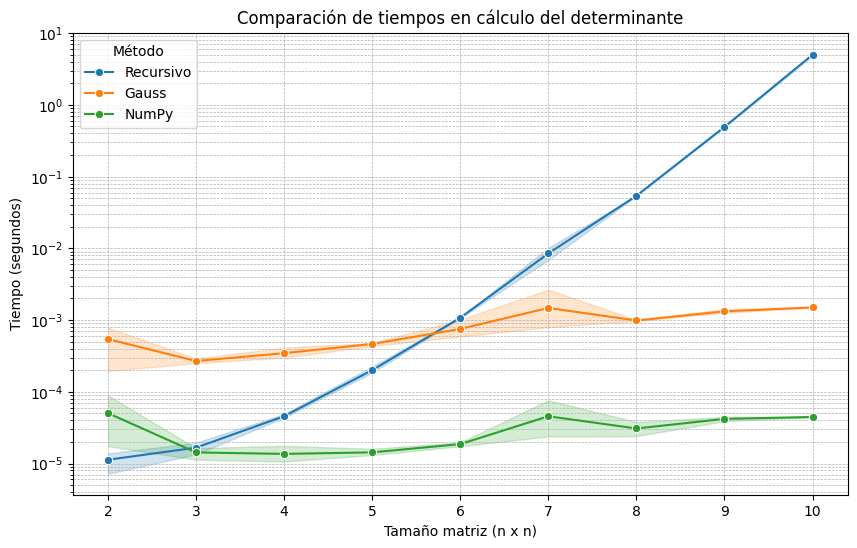

In [11]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asumo que tienes definidas las funciones determinante_recursivo y determinante_gauss
# Si no, debes definirlas o importarlas aquí.

def medir_tiempos(n_min=2, n_max=10, repeticiones=3):
    datos = []

    for n in range(n_min, n_max + 1):
        for _ in range(repeticiones):
            matriz = np.random.randint(-10, 10, size=(n, n)).tolist()

            # Método recursivo
            try:
                start = time.perf_counter()
                determinante_recursivo(matriz)
                t_rec = time.perf_counter() - start
            except RecursionError:
                t_rec = None

            # Método Gauss
            start = time.perf_counter()
            determinante_gauss(matriz)
            t_gauss = time.perf_counter() - start

            # Método NumPy
            matriz_np = np.array(matriz)
            start = time.perf_counter()
            np.linalg.det(matriz_np)
            t_np = time.perf_counter() - start

            datos.append({
                "n": n,
                "Método": "Recursivo",
                "Tiempo (s)": t_rec
            })
            datos.append({
                "n": n,
                "Método": "Gauss",
                "Tiempo (s)": t_gauss
            })
            datos.append({
                "n": n,
                "Método": "NumPy",
                "Tiempo (s)": t_np
            })

    return pd.DataFrame(datos)

# Ejecutar y obtener datos
df = medir_tiempos()

# Filtrar datos válidos para el recursivo (evitar None)
df_filtered = df[(df["Método"] != "Recursivo") | (df["Tiempo (s)"].notna())]

# Gráfico con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x="n", y="Tiempo (s)", hue="Método", marker="o")
plt.title("Comparación de tiempos en cálculo del determinante")
plt.xlabel("Tamaño matriz (n x n)")
plt.ylabel("Tiempo (segundos)")
plt.yscale("log")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


# Ejercicio 2 
En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye
otra herramienta crucial, en esta ocasión de la rama del cálculo, para el proceso de retropro-
pagación asociado al entrenamiento de una red neuronal.


## **a) [1 punto] Prográmese en Python el método de descenso de gradiente para funciones de n variables. La función deberá tener como parámetros de entradas:**

El gradiente de la función que se desea minimizar ∇f (puede venir dada como otra
función previamente implementada, grad f, con entrada un vector, representando
el punto donde se quiere calcular el gradiente, y salida otro vector, representando
el gradiente de f en dicho punto).

Un valor inicial x0 ∈ Rn (almacenado en un vector de n componentes).

El ratio de aprendizaje γ (que se asume constante para cada iteración).

Un parámetro de tolerancia tol (con el que finalizar el proceso cuando ∥∇f (x)∥2 <
tol).

Un número máximo de iteraciones maxit (con el fin de evitar ejecuciones indefinidas
en caso de divergencia o convergencia muy lenta).

La salida de la función deberá ser la aproximación del x que cumple f ′ (x) ≈ 0, corres-
pondiente a la última iteración realizada en el método.


In [13]:
import numpy as np

def descenso_gradiente(grad_f, x0, gamma, tol=1e-6, maxit=1000):
    """
    Implementa el método de descenso de gradiente para minimizar una función multivariable.

    Parámetros:
    - grad_f: función que recibe un vector x y retorna el gradiente ∇f(x) como vector.
    - x0 (np.ndarray): vector inicial en R^n.
    - gamma (float): ratio de aprendizaje (tasa de paso).
    - tol (float): tolerancia para el criterio de parada, usando la norma L2 del gradiente.
    - maxit (int): número máximo de iteraciones permitidas.

    Retorna:
    - x (np.ndarray): punto aproximado donde ∇f(x) ≈ 0.
    """
    x = np.array(x0, dtype=float)

    for i in range(maxit):
        grad = grad_f(x)
        norm_grad = np.linalg.norm(grad)

        if norm_grad < tol:
            print(f"Convergencia alcanzada en {i} iteraciones.")
            return x

        x = x - gamma * grad

    print("Número máximo de iteraciones alcanzado sin convergencia.")
    return x


#### Ejemplo de uso:

Suponiendo que se quiere minimizar la función:

$$
f(x, y) = x^2 + y^2
$$

Entonces su gradiente es:

$$
\nabla f(x, y) = [2x,\ 2y]
$$


In [14]:
# Definimos el gradiente de f
def gradiente_f(x):
    return 2 * x

# Punto inicial
x0 = np.array([3.0, 4.0])

# Llamada al método
sol = descenso_gradiente(grad_f=gradiente_f, x0=x0, gamma=0.1, tol=1e-6, maxit=100)

print("Mínimo aproximado en:", sol)

Convergencia alcanzada en 73 iteraciones.
Mínimo aproximado en: [2.52749500e-07 3.36999333e-07]


## **b) Sea la función f : R → R dada por $f (x) = 3x^4 + 4x^3 − 12x^2 + 7.**

**i [0.5 puntos] Aplica el método sobre f (x) con $x_0$ = 3 γ = 0.001, tol=1e-12,
maxit=1e5.**

In [19]:
# Gradiente de f(x) = 3x^4 + 4x^3 - 12x^2 + 7
# ∇f(x) = 12x^3 + 12x^2 - 24x

def grad_f(x):
    return np.array([12 * x[0]**3 + 12 * x[0]**2 - 24 * x[0]])

# Punto inicial como vector
x0 = np.array([3.0])

# Parámetros
gamma = 0.001
tol = 1e-12
maxit = int(1e5)

# Llamada al método genérico
resultado = descenso_gradiente(grad_f, x0, gamma, tol, maxit)

# Mostrar resultado
print("Mínimo aproximado en x =", resultado[0])


Convergencia alcanzada en 831 iteraciones.
Mínimo aproximado en x = 1.0000000000000275


**ii [0.5 puntos] Aplica de nuevo el método sobre f (x) con x0 = 3, γ = 0.01,
tol=1e-12, maxit=1e5.**

In [20]:
# Punto inicial
x0 = np.array([3.0])

# Nuevos parámetros
gamma = 0.01
tol = 1e-12
maxit = int(1e5)

# Llamada al método
resultado = descenso_gradiente(grad_f, x0, gamma, tol, maxit)

# Mostrar resultado
print("Mínimo aproximado en x =", resultado[0])

Convergencia alcanzada en 31 iteraciones.
Mínimo aproximado en x = -1.9999999999999882


**iii [0.5 puntos] Contrasta e interpreta los dos resultados obtenidos en los apartados
anteriores y compáralos con los mı́nimos locales obtenidos analı́ticamente. ¿Qué
influencia puede llegar a tener la elección del ratio de aprendizaje γ?**

#### Análisis comparativo de los resultados del descenso de gradiente

Sea la función objetivo:

$$
f(x) = 3x^4 + 4x^3 - 12x^2 + 7,
$$

cuyo gradiente está dado por:

$$
f'(x) = 12x^3 + 12x^2 - 24x.
$$

#### Puntos críticos y mínimos locales

Para hallar los extremos de la función, resolvemos la ecuación:

$$
f'(x) = 0 \Rightarrow 12x(x^2 + x - 2) = 0 \Rightarrow x = 0,\ x = 1,\ x = -2.
$$

Calculamos la segunda derivada para clasificar los puntos críticos:

$$
f''(x) = 36x^2 + 24x - 24.
$$

- $f''(0) = -24$: máximo local en $x = 0$,
- $f''(1) = 36$: mínimo local en $x = 1$,
- $f''(-2) = 72$: mínimo local en $x = -2$.

#### Resultados del método de descenso de gradiente

Se aplica el método con punto inicial $x_0 = 3$ y dos valores distintos del parámetro $\gamma$:

| Parámetro \( \gamma \) | Iteraciones | Resultado obtenido | Interpretación |
|------------------------|-------------|--------------------|----------------|
| 0.001                  | 831         | $x \approx 1.0000000000000275$ | Mínimo local en $x = 1$ |
| 0.01                   | 31          | $x \approx -1.9999999999999882$ | Mínimo local en $x = -2$ |

#### Interpretación

Ambos resultados son correctos y corresponden a mínimos locales de la función. Sin embargo, el valor del parámetro $\gamma$ (tasa de aprendizaje) influye directamente en el recorrido y destino del algoritmo. Con $\gamma = 0.001$, el algoritmo avanza con pasos pequeños, por lo que converge al mínimo más cercano a la condición inicial, que es $x = 1$. En cambio, al incrementar la tasa de aprendizaje a $\gamma = 0.01$, los pasos son mayores, lo que permite que el algoritmo atraviese el mínimo en $x = 1$ y alcance el mínimo en $x = -2$, más profundo.

La elección del parámetro $\gamma$ es afecta el comportamiento del método de descenso de gradiente. Un valor pequeño garantiza estabilidad pero puede limitar la búsqueda a mínimos locales cercanos. Por otro lado, un valor mayor puede permitir escapar de mínimos locales, aunque con el riesgo de divergencia si es demasiado alto. Por tanto, se debe elegir cuidadosamente en función de la función objetivo y el punto inicial.


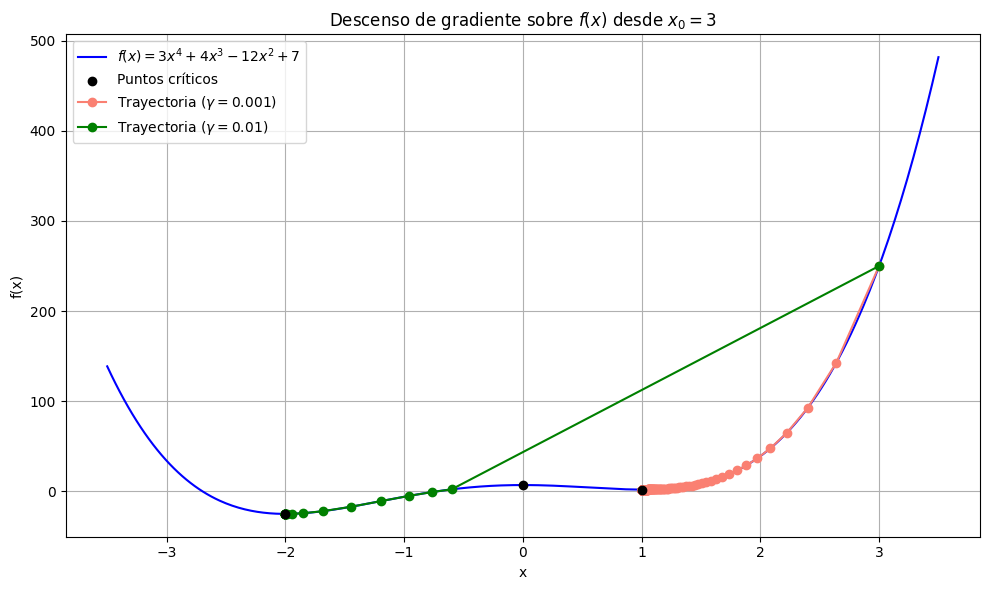

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función y su derivada
def f(x):
    return 3 * x**4 + 4 * x**3 - 12 * x**2 + 7

def grad_f_scalar(x):
    return 12 * x**3 + 12 * x**2 - 24 * x

# Función para obtener trayectoria del descenso de gradiente
def trayectoria_descenso_gradiente(x0, gamma, tol=1e-12, maxit=100000):
    x_vals = [x0]
    x = x0
    for _ in range(int(maxit)):
        grad = grad_f_scalar(x)
        if abs(grad) < tol:
            break
        x = x - gamma * grad
        x_vals.append(x)
    return np.array(x_vals)

# Generar trayectorias para dos gammas distintas
x_traj_1 = trayectoria_descenso_gradiente(3.0, gamma=0.001)
x_traj_2 = trayectoria_descenso_gradiente(3.0, gamma=0.01)

# Valores para graficar la función
x = np.linspace(-3.5, 3.5, 400)
y = f(x)

# Puntos críticos
criticos_x = np.array([-2, 0, 1])
criticos_y = f(criticos_x)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$f(x) = 3x^4 + 4x^3 - 12x^2 + 7$", color='blue')
plt.scatter(criticos_x, criticos_y, color='black', zorder=5, label="Puntos críticos")
plt.plot(x_traj_1, f(x_traj_1), 'o-', label=r"Trayectoria ($\gamma = 0.001$)", color='salmon')
plt.plot(x_traj_2, f(x_traj_2), 'o-', label=r"Trayectoria ($\gamma = 0.01$)", color='green')

plt.title("Descenso de gradiente sobre $f(x)$ desde $x_0 = 3$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**iv [0.5 puntos] Aplica nuevamente el método sobre f (x) con x0 = 3, γ = 0.1,
tol=1e-12, maxit=1e5. Interpreta el resultado.**

Al aplicar el método de descenso de gradiente sobre la función $f(x) = 3x^4 + 4x^3 - 12x^2 + 7$ con un punto inicial $x_0 = 3$, una tasa de aprendizaje $\gamma = 0.1$, tolerancia $10^{-12}$ y un máximo de $10^5$ iteraciones, se produjo un error de desbordamiento numérico (`OverflowError`). Este comportamiento indica que el algoritmo diverge debido a que la tasa de aprendizaje es demasiado grande. Los valores de $x$ aumentan rápidamente y generan gradientes excesivamente grandes, lo que lleva a una explosión de los valores calculados. Por tanto, el método no logra estabilizarse ni aproximarse a un mínimo, lo cual demuestra que una elección inapropiada del parámetro $\gamma$ puede hacer que el descenso de gradiente sea ineficaz e incluso impracticable. Este resultado resalta la importancia de ajustar cuidadosamente la tasa de aprendizaje para asegurar la convergencia del método.


In [23]:
# Punto inicial
x0 = np.array([3.0])

# Nuevos parámetros
gamma = 0.1
tol = 1e-12
maxit = int(1e5)

# Llamada al método
resultado = descenso_gradiente(grad_f, x0, gamma, tol, maxit)

# Mostrar resultado
print("Mínimo aproximado en x =", resultado[0])

/tmp/ipykernel_17145/1006856626.py:5: RuntimeWarning: overflow encountered in scalar power
  return np.array([12 * x[0]**3 + 12 * x[0]**2 - 24 * x[0]])
/tmp/ipykernel_17145/1006856626.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([12 * x[0]**3 + 12 * x[0]**2 - 24 * x[0]])


Número máximo de iteraciones alcanzado sin convergencia.
Mínimo aproximado en x = nan


**v [0.5 puntos] Finalmente, aplica el método sobre f (x) con x0 = 0, γ = 0.001,
tol=1e-12, maxit=1e5. Interpreta el resultado y compáralo con el estudio analı́tico
de f . ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?**

Al aplicar el método de descenso de gradiente sobre la función $f(x) = 3x^4 + 4x^3 - 12x^2 + 7$, partiendo desde el punto inicial $x_0 = 0$, con tasa de aprendizaje $\gamma = 0.001$, tolerancia $10^{-12}$ y un máximo de $0^5$ iteraciones, el algoritmo converge de manera inmediata, detectando que el gradiente en $x = 0$ es exactamente cero. Sin embargo, el estudio analítico revela que $f''(0) = -24$, lo que implica que $x = 0$ corresponde a un máximo local (Punto de Silla). Por lo tanto, aunque la solución numérica es válida desde la perspectiva de cálculo, no es un resultado deseable en el contexto de minimización. Este comportamiento ocurre porque el método de descenso de gradiente no distingue entre máximos, mínimos o puntos de silla cuando el gradiente se anula en el punto inicial, lo que subraya la importancia de analizar la concavidad de la función o emplear métodos alternativos que permitan escapar de puntos no óptimos.

Convergencia alcanzada en 0 iteraciones.
Mínimo aproximado en x = 0.0


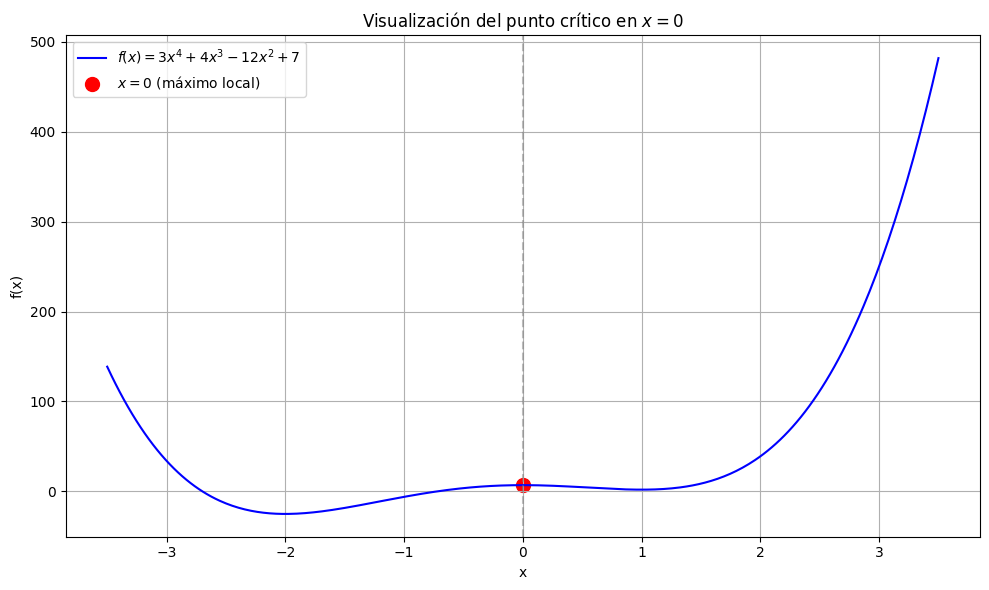

In [26]:
import matplotlib.pyplot as plt
# Punto inicial
x0 = np.array([0.0])

# Nuevos parámetros
gamma = 0.001
tol = 1e-12
maxit = int(1e5)

# Llamada al método
resultado = descenso_gradiente(grad_f, x0, gamma, tol, maxit)

# Mostrar resultado
print("Mínimo aproximado en x =", resultado[0])



# Función
def f(x):
    return 3 * x**4 + 4 * x**3 - 12 * x**2 + 7

# Valores para graficar
x_vals = np.linspace(-3.5, 3.5, 400)
y_vals = f(x_vals)

# Punto crítico en x = 0
x_critico = 0.0
y_critico = f(x_critico)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = 3x^4 + 4x^3 - 12x^2 + 7$", color='blue')
plt.scatter([x_critico], [y_critico], color='red', s=100, label=r"$x = 0$ (máximo local)")
plt.axvline(x=0, linestyle="--", color='gray', alpha=0.5)

plt.title("Visualización del punto crítico en $x = 0$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## **c) Sea la función g : R2 → R dada por g(x, y) = x2 + y 3 + 3xy + 1.**

**i [0.5 puntos] Aplı́quese el método sobre g(x, y) con x0 = (−1, 1), γ = 0.01,
tol=1e-12, maxit=1e5.**




**ii [0.5 puntos] ¿Qué ocurre si ahora partimos de x0 = (0, 0)? ¿Se obtiene un resultado
deseable?**



**iii [0.5 puntos] Realı́cese el estudio analı́tico de la función y utilı́cese para explicar y
contrastar los resultados obtenidos en los dos apartados anteriores.**